<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h2>Ingeniero Renzo Bolivar - Docente DAIE</h2> </center> 


<center> <h1>Curso : Computación 2</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

<center> <h1>MACHINE LEARNING</h1> </center> 
<center> <h1>ÁRBOL DE DECISIÓN -ENFERMEDADES</h1> </center> 

## Integrantes:

* Colque Apaza, Esmeralda Tatiana
* Espinoza Turpo, Yeferson Gustavo
* Hirpanoca Turpo, Gueyson
* Quispe Bejar, Jairo Jorge
* Valencia Solari, Saul Paolo
* Valdivia Aragon, Marco Andree

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

# Entendimiento los datos:

Contiene la siguiente información para cada núcleo celular:
1. número de identificación
2. diagnóstico: M = maligno(malignant), B = benigno(benign)
3. radio (radius) (media de las distancias del centro a los puntos del perímetro)
4. textura (texture) (desviación estándar de los valores de la escala de grises)
5. perímetro (perimeter)
6. área (area)
7. suavidad (smoothness)(variación local en longitudes de radio)
8. compacidad (compactness)(perímetro² / área — 1,0)
9. concavidad (concavity) (severidad de las porciones cóncavas del contorno)
10. puntos cóncavos (concave points)(número de porciones cóncavas del contorno)
11. simetría (symmetry)
12. dimensión fractal (fractal dimensión)("coastline approximation" — 1)

Para cada imagen se calcularon las características de la 3 a la 12 en tres grupos, la media (mean), la desviación típica (se) y el peor (worst) (media de los tres valores más grandes).Por lo que de cada *identificación* con *diagnostico*, tendremos 30 características (columnas de la 3 a la 32) para un total de 569 observaciones.

## <font color=#33A5FF>****1. REVISAR EL ESTADO DE SALUD DEL DATASET****<tfont>

In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv('data.csv', delimiter=',', header=0)

#mostramos las 5 primeras filas
df.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [3]:
#Nombres de columnas
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
# Obtener información general sobre el DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#Vemos nº de filas y columnas del dataframe
df.shape

(569, 33)

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

## <font color=#33A5FF>****2.ANÁLISIS EXPLORATORIO DE DATOS****<tfont>

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

### ANÁLISIS UNIVARIADO

Vemos que hay dos valores para el diagnóstico y que B es el más frecuente, concretamente 357 de un total de 569. Corroboramos que el resto de valores son numéricos y observamos que la última columna tiene todos valores nulos.
Veamos los valores de nuestra única variable categórica *diagnosis*

In [7]:
#calculamos cuántas muestras hay de cada diagnóstico
df.groupby(['diagnosis']).id.count()

diagnosis
B    357
M    212
Name: id, dtype: int64

###  Limpieza de datos

In [8]:
#Comprobamos la existencia de valores NA's en las muestras.
df.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [9]:
#Ya sabemos que la columna 32 tiene todos los valores NaN, nos aseguramos para eliminarla
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
#eliminamos esa columna al no aportar ningún valor
df = df.drop(df.columns[32], axis='columns')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### ANÁLISIS BIVARIADO

Text(0.5, 1.0, 'Número de muestras benignas (B) y malignas (M)')

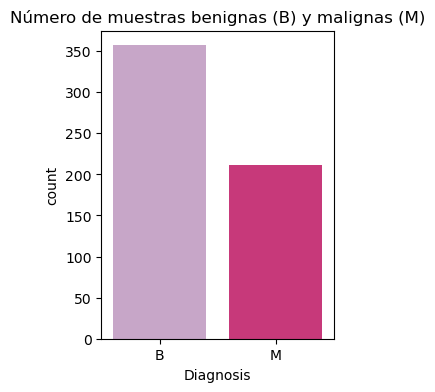

In [11]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(3,4))
sns.countplot(x = 'diagnosis', data = df, order = df['diagnosis'].value_counts().index, palette = "PuRd")
plt.xlabel("Diagnosis")
plt.title("Número de muestras benignas (B) y malignas (M)")


#### Eliminación de columna id
Eliminamos la columna 'id' al ser el identificador de muestra que no aporta valor para el modelo.

In [12]:
#eliminamos la primera columna que contiene un identificador de la muestra pues no tiene valor para nuestro proposito, y así garantizamos además que los datos no puedas ser identificados de forma nominal
df = df.drop([ 'id'], axis = 1 ) 
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Outliers
Vemos si hay valores considerablemente diferentes al resto de datos. Para ello representamos con un *box plot* las columnas. La columna *diagnosis* no será necesario, pues es la variable objetivo. Previamente normalizamos las variables, esto es eliminando la media y escalando los datos de forma que su varianza sea igual a 1. Esto nos permitira comparar mejor los datos.

In [13]:
X  = df.drop(['diagnosis'], axis = 1 ) 
#estandarizamos los datos para visualiarlos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

features_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(data=features_scaled, columns=X.columns)
X_scaled.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [14]:
#visualizamos las variables
X_scaled.keys()

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Text(0, 0.5, 'Valores estandarizados')

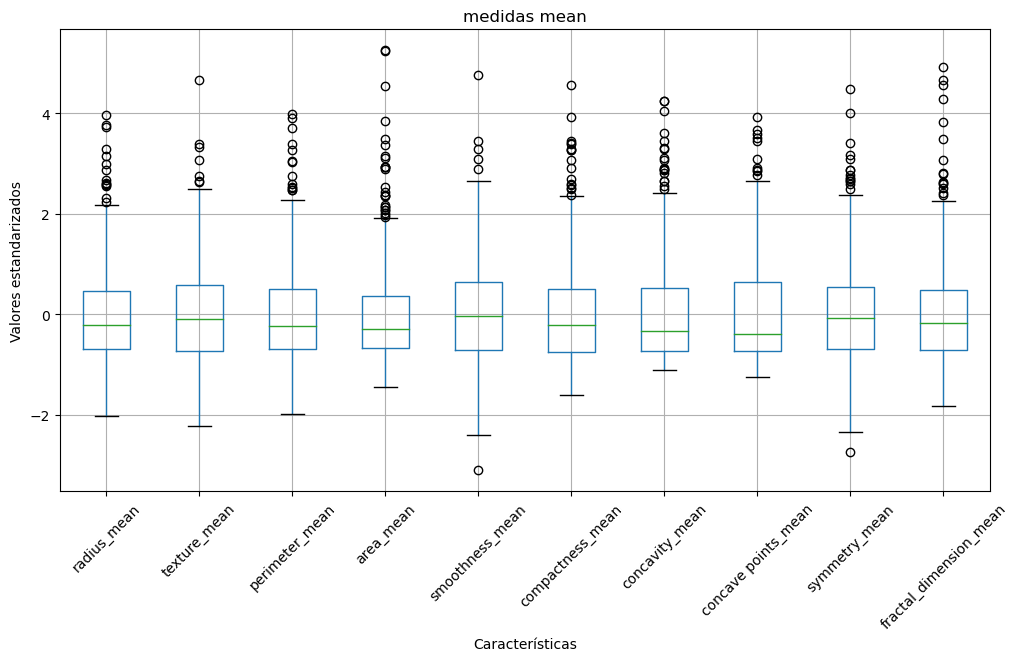

In [15]:
#representamos los datos cada 10 columnas (mean, se y worst)
#de la 0 a la 10 los datos medios (mean)
X_scaled.iloc[:, 0:10].boxplot(figsize =(12, 6))
plt.xticks(rotation=45)
plt.title("medidas mean")
plt.xlabel("Características")
plt.ylabel("Valores estandarizados")


Parece que 'radius_mean' y 'concave points_mean' tienen medias con menos datos anómalos

Text(0, 0.5, 'Valores estandarizados')

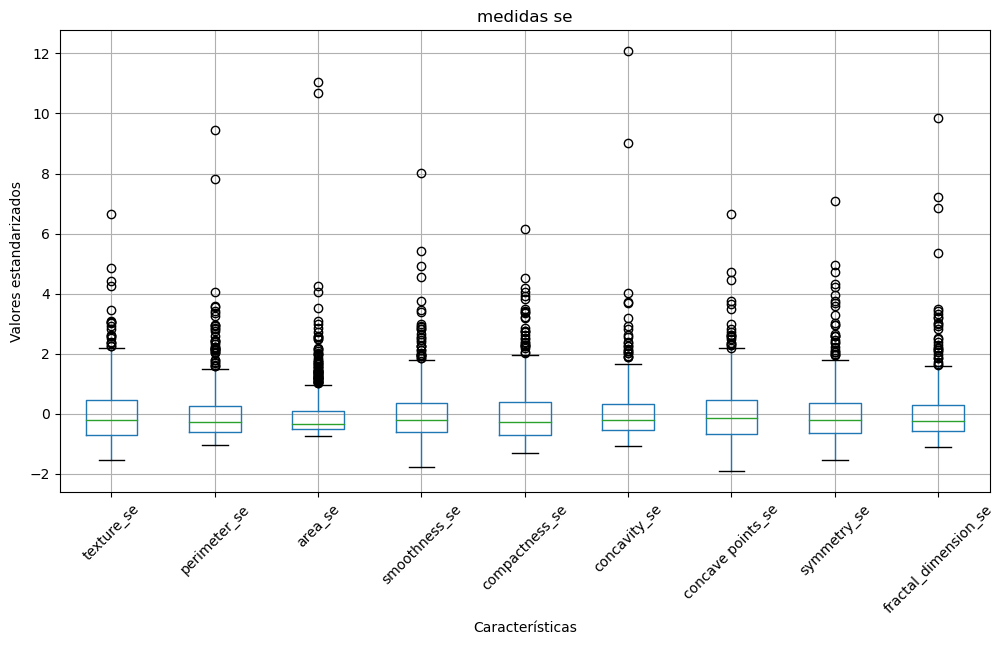

In [16]:
#de la 11 a la 20, los datos de squared error (se)
X_scaled.iloc[:, 11:20].boxplot(figsize =(12, 6))
plt.xticks(rotation=45)
plt.title("medidas se")
plt.xlabel("Características")
plt.ylabel("Valores estandarizados")

Las médidas de desviación estandard es claro que contienen más outliers que las anteriores

Text(0, 0.5, 'Valores estandarizados')

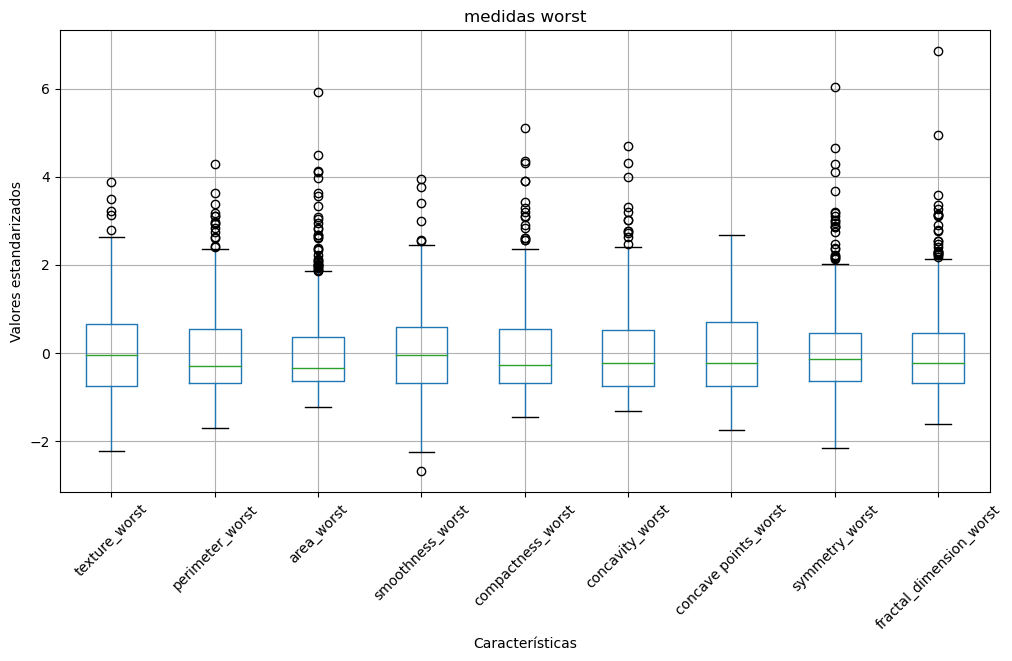

In [17]:
#Por último las columnas de la 21 a la 30, las medidas más negativas (worst)
X_scaled.iloc[:, 21:30].boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title("medidas worst")
plt.xlabel("Características")
plt.ylabel("Valores estandarizados")

Destaca la variable 'concave points_worst' que carece de outliers.



### Matriz de Correlación

Vemos la correlación entre las mismas variables y entre el objetivo *diagnosis*. Generamos una matriz de correlación entre las variables que nos han quedado después de una primera, y más elemental limpieza de datos.

Pretendemos con esto ver la relación entre el resto de variables y ver si alguna de ellas podría ser prescindible en nuestro análisis.

In [18]:
cdf = pd.get_dummies(df, columns = ["diagnosis"])
cdf

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


In [19]:
#borramos la primera columna generada
cdf = pd.get_dummies(df, columns = ["diagnosis"], drop_first = True)
#renombramos diagnosis_M por diagnosis
cdf.rename(columns={'diagnosis_M':'diagnosis'}, inplace = True)
cdf

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


Generaremos la matriz de correlación de pearson, que mide el grado de relación lineal entre cada par de variables. Los valores de correlación se pueden ubicar entre -1 y +1:

- -1 indica una correlación lineal perfectamente negativa entre dos variables
- 0 indica que no hay correlación lineal entre dos variables
- 1 indica una correlación lineal perfectamente positiva entre dos variables

Cuanto más lejos esté el coeficiente de correlación de cero, más fuerte será la relación entre las dos variables.

In [20]:
#creamos la matriz de correlación
corr_df = cdf.corr(method='pearson')
corr_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


Observamos que la matriz por si misma, es dificil de leer y ver. Pero vamos a mostrar como insertar de forma sencilla un mapa de calor sobre la matriz de correlación que visualmente nos va a indicar el estado de las correlaciones.

#### Redución de variables
Una vez estudiados los datos (y el informe proporcionado por pandas-profiling) vemos que hay gran correlación entre las variables. Por lo tanto:

- Eliminaremos las variables poco correladas con el objetivo ('diagnosis') cuyo valor absoluto sea menor o igual a 0.1

- Eliminaremos después variables fuertemente correladas entre ellas (consideramos fuertemente correladas un valor mayor a 0.8). Se eliminará de cada grupo la menos correlada con el objetivo

In [21]:
#seleccionamos la correlación con el objetivo y lo ordenamos de mayor a menor correladas
corr_diagnosis = corr_df['diagnosis']
corr_diagnosis_ord = abs(corr_diagnosis).sort_values(ascending=False)
corr_diagnosis_ord

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

Tenemos como mejor variable predictora (y que más influye en consecuencia
a la hora de detectar un diagnóstico maligno) 'concave points_worst' con una correlación > 0.79. 
Le siguen 'perimeter_worst' con > 0.78 y 'concave points_mean' con casi 0.78


In [22]:
#seleccionamos las variables con correlaciones bajas con el objetivo (valor <=0.1)
baja_corr = corr_diagnosis_ord[abs(corr_diagnosis_ord) <= 0.1]
baja_corr

fractal_dimension_se      0.077972
smoothness_se             0.067016
fractal_dimension_mean    0.012838
texture_se                0.008303
symmetry_se               0.006522
Name: diagnosis, dtype: float64

In [23]:
#las eliminamos de nuestro dataset
cdf = cdf.drop(baja_corr.index, axis=1)
cdf.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Observamos que la nueva dimensión de nuestro dataset es ahora de 26 columnas

#### Eliminamos de las variables más correladas entre ellas, las menos correladas con la columna objetivo

In [24]:
#creamos la matriz de correlación entre las variables que nos quedan 
corr_cdf = cdf.corr(method='pearson')
#quitamos el objetivo 'diagnosis'
corr_X = corr_cdf.drop(['diagnosis'],axis =1).drop(['diagnosis'],axis=0)
corr_X.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.679090,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,0.275869,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.691765,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.732562,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.301467,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


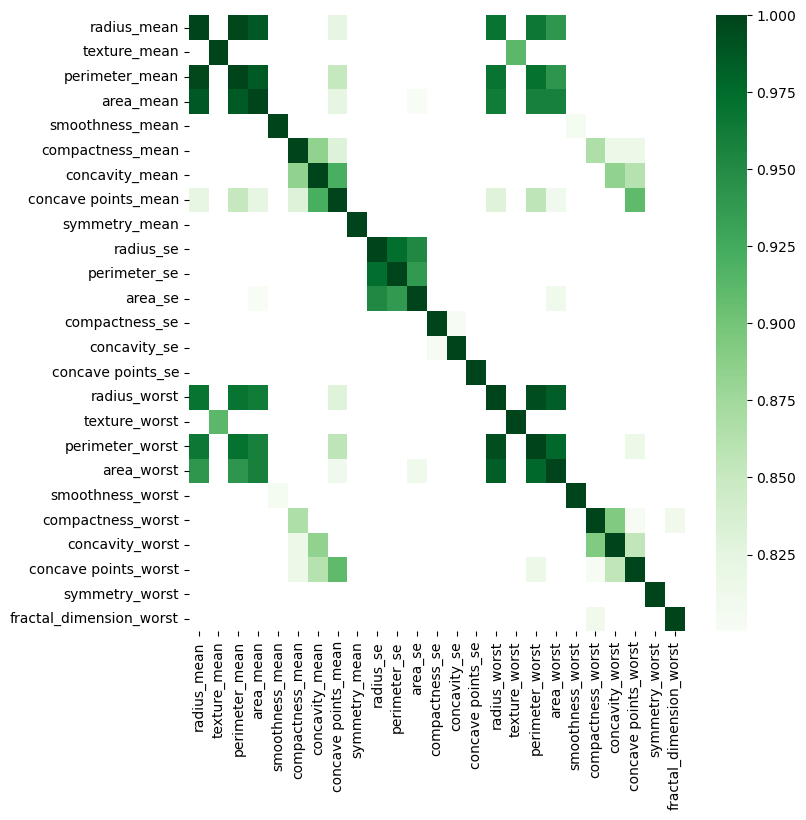

In [25]:
#vemos el mapa de calor de las variables cuya correlación es > 0.8
plt.figure(figsize=(8,8))
sns.heatmap(corr_X[abs(corr_X) > 0.8], cmap="Greens")
plt.show()


- Según vemos en estas matrices (y podemos ver también en el informe generado) hay mayor correlación entre las variables:
    *radius_mean* y *perimeter_mean* (casi 1) (*area_mean* también lo es, aunque en menor medida)
- También encontramos alta correlación entre:
    *radius_worst* y *perimeter_worst* (0.99) (*area_worst* también lo es, aunque en menor medida)
- Y un poco menos pero alta también entre:
    *radius_se*,*perimeter_se* y *area_se*
                                                                        

In [26]:
#hacemos parejas eliminando las repetidas
upper_corr_X = corr_X.where(np.triu(np.ones(corr_X.shape), k=1).astype(bool)) 
pares = upper_corr_X.unstack().dropna() 
#quitamos los valores correlados =1 y nos quedamos con los mayores de 0.8
pares= pares[(abs(pares) != 1) & (abs(pares) > 0.8)]
#las ordenamos
pares_ord = pares.sort_values(ascending = False) 
pares_ord

perimeter_mean           radius_mean            0.997855
perimeter_worst          radius_worst           0.993708
area_mean                radius_mean            0.987357
                         perimeter_mean         0.986507
area_worst               radius_worst           0.984015
                         perimeter_worst        0.977578
perimeter_se             radius_se              0.972794
perimeter_worst          perimeter_mean         0.970387
radius_worst             radius_mean            0.969539
                         perimeter_mean         0.969476
perimeter_worst          radius_mean            0.965137
radius_worst             area_mean              0.962746
area_worst               area_mean              0.959213
perimeter_worst          area_mean              0.959120
area_se                  radius_se              0.951830
area_worst               perimeter_mean         0.941550
                         radius_mean            0.941082
area_se                  perime

Estas son las parejas de variables más correladas entre ellas. 
Eliminamos de cada pareja la menos correlada con la columna objetivo 'diagnosis'

In [27]:
#construimos una lista con los pares de variables
lista = pares_ord.index.tolist()
# variables a borrar (las menos correladas con diagnosis)
borrar = []
lista_borrar = []
for i in range(len(lista)):
    c0 = corr_cdf.loc[lista[i][0],'diagnosis']
    c1 = corr_cdf.loc[lista[i][1],'diagnosis']
    if (c1 < c0).all() : 
        borrar = lista[i][1] 
    else: 
        borrar = lista[i][0]  # Obtener la característica menos correlada con el objetivo
    if borrar not in lista_borrar:
        lista_borrar.append(borrar)
lista_borrar

['radius_mean',
 'radius_worst',
 'area_mean',
 'area_worst',
 'perimeter_se',
 'perimeter_mean',
 'area_se',
 'concavity_mean',
 'texture_mean',
 'concave points_mean',
 'compactness_worst',
 'concavity_worst',
 'compactness_mean',
 'perimeter_worst',
 'fractal_dimension_worst',
 'smoothness_mean',
 'concavity_se']

In [28]:
#las eliminamos del dataframe
cdf = cdf.drop(lista_borrar, axis=1)
cdf.head(5)

,symmetry_mean,radius_se,compactness_se,concave points_se,texture_worst,smoothness_worst,concave points_worst,symmetry_worst,diagnosis
0,0.2419,1.0950,0.04904,0.01587,17.33,0.1622,0.2654,0.4601,1
1,0.1812,0.5435,0.01308,0.01340,23.41,0.1238,0.1860,0.2750,1
2,0.2069,0.7456,0.04006,0.02058,25.53,0.1444,0.2430,0.3613,1
3,0.2597,0.4956,0.07458,0.01867,26.50,0.2098,0.2575,0.6638,1
4,0.1809,0.7572,0.02461,0.01885,16.67,0.1374,0.1625,0.2364,1


# Preparación de los datos


Debemos separar la variable objetivo *diagnosis* que es la columna 8, del resto de variables. Recordamos que ya esta columna la habíamos vuelto numérica para observar la correlación con el resto de variables.
Realizamos dos grupos de datos X con las variables predictoras e Y con la variable objetivo.

In [29]:
X = cdf.iloc[:, 0:8].values
y = cdf.iloc[:, 8].values

## División del set de datos

Separamos los datos en entrenamiento (train) un 70% y test el 30%. Aunque para calcular el mejor modelo vamos a utilizar [validación cruzada](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) que nos va a garantizar que la puntuación del modelo no está relacionada con la técnica que utilizamos para elegir el conjunto de datos de prueba o de entrenamiento.

In [30]:
# utilizamos la libreria sklearn
import sklearn
from sklearn.model_selection import train_test_split

# Sin rebalanceo de clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)



# Modelado


In [31]:
#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix
model=DecisionTreeClassifier(criterion="gini",max_depth=7, min_samples_split=6, min_samples_leaf=2)

In [32]:
model_train=model.fit(preD1,columnO)
model_train

NameError: name 'preD1' is not defined

### Verificación del modelo desarrollado

A llegado el momento de verificar que tan preciso es el modelo desarrollado para ello utilizamos modulo `score` de los Datos de Prueba.

In [ ]:
precision = model_train.score(preD1_test,columnO_test)
print("Precision del modelo Datos Prueba: ")
print(precision)

In [ ]:
precision2=model_train.score(preD1_train,columnO_train)
print("precision del modelo Datos Entrenamiento: ")
print(precision2)

### DASH

In [ ]:
#DashApp
from dash import dash, dcc, html
from dash import dash, dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    dbc.Row([
        dbc.Col(dcc.Graph(id='graph1', figure=fig_1), width=5),
        dbc.Col(dcc.Graph(id='graph2', figure=fig_2), width=5),
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='graph3', figure=fig_3), width=5),
        dbc.Col(dcc.Graph(id='graph4', figure=fig_4), width=5),
    ]),
])

if __name__ == "__main__":
    app.run_server(debug=True, use_reloader=False)